Presetation At 2018/11/12 -Lishuo Pan

# Part I: Pre-process the Data Set
- Complete dataset.
 - principle: in the next line, if there is a nan, keep the value same as the last line within same column
- Sample dataset: fix frequency as minute.

Features: Time, Bid_price, Ask_price, Bid_size, Ask_size

In [45]:
# import some basic package
%matplotlib inline
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [46]:
# read the csv file in to dataframe. Read four days
df1 = pd.read_csv("./data/Day1.csv",header = 0,sep = ',')
df2 = pd.read_csv("./data/Day2.csv",header = 0,sep = ',')
df3 = pd.read_csv("./data/Day3.csv",header = 0,sep = ',')
df4 = pd.read_csv("./data/Day4.csv",header = 0,sep = ',')

In [47]:
# this module is to divide the time into minitus.
def min_dividor(Data_with_date):
    index = list()
    index.append(0)
    # first_row = Data[0,:]
    for i in np.arange(1,Data_with_date.shape[0]):
#         print(Data_with_date[i,:][0][15])
        if Data_with_date[i,:][0][15] != Data_with_date[i-1,:][0][15]:
            index.append(i)
    Data_min = Data_with_date[index,:]
    return Data_min
def complete_data(Data):
    n = Data.shape[0]
    d = Data.shape[1]
    for i in range(n):
        for j in np.arange(1,d):
            if math.isnan(Data[i,j]):
                Data[i,j] = Data[i-1,j]
    return Data

# Part II: Print out the overall price trend of stock. And choose a proper divide for the time.

In [48]:
min_divide = 1 #0 for off, 1 for on for the minite dividor

In [49]:
# structurelize the data for further usage (matrixlize the data & data completion);
# n: dataset size; d: dimension
Data1 = df1.values
Data2 = df2.values
Data3 = df3.values
Data4 = df4.values


# complete the dataset:
# principle: in the next line, if there is a nan, 
# keep the value same as the last line within same column
Data1c = complete_data(Data1)
Data2c = complete_data(Data2)
Data3c = complete_data(Data3)
Data4c = complete_data(Data4)

if min_divide == 1:
    Data = np.vstack((min_dividor(Data1c),min_dividor(Data2c),min_dividor(Data3c),min_dividor(Data4c)))
else:
    Data = np.vstack((Data1c,Data2c,Data3c,Data4c))
# get rid of first column: the time
Data = np.delete(Data, 0, axis=1)


In [50]:
# n: dataset size; d: dimension
n = Data.shape[0]
d = Data.shape[1]

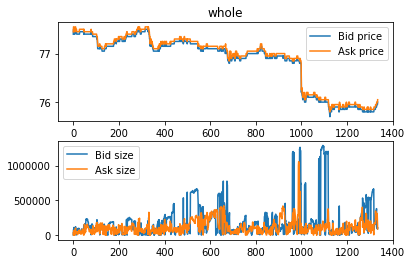

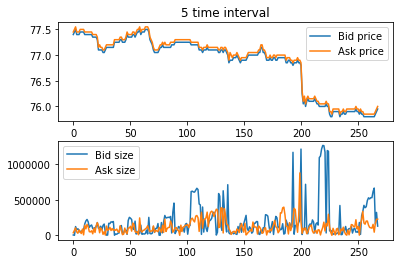

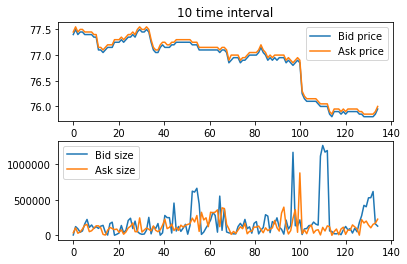

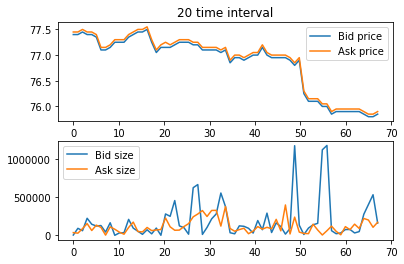

In [51]:
# This module print the Bid & Ask price, Bid & Ask size
def plot_trend(Data, tag):
    fig, axs = plt.subplots(2,1)
    n = Data.shape[0]
    d = Data.shape[1]
    time = np.linspace(0,n,n)
    BidP = Data[:,0]
    Askp = Data[:,2]
    Bidsize = Data[:,1]
    Asksize = Data[:,3]
    
    ax = axs[0]
    ax.plot(time,BidP,label='Bid price')
    ax.plot(time,Askp,label='Ask price')
    ax.legend()
    ax.set_title(tag)
    ax = axs[1]
    ax.plot(time,Bidsize,label='Bid size')
    ax.plot(time,Asksize,label='Ask size')
    ax.legend()
    plt.show()
    
# plot the whole trend   
plot_trend(Data,'whole')

if min_divide == 1:
    # plot with 5 time slot
    interval = 5
    index = np.arange(0,n,interval)
    plot_trend(Data[index,:],str(interval)+' time interval')

    # plot with 10 time slot
    interval = 10
    index = np.arange(0,n,interval)
    plot_trend(Data[index,:],str(interval)+' time interval')

    # plot with 20 time slot
    interval = 20
    index = np.arange(0,n,interval)
    plot_trend(Data[index,:],str(interval)+' time interval')
else:
    # plot with 20 time slot
    interval = 20
    index = np.arange(0,n,interval)
    plot_trend(Data[index,:],str(interval)+' time interval')

    # plot with 30 time slot
    interval = 30
    index = np.arange(0,n,interval)
    plot_trend(Data[index,:],str(interval)+' time interval')

    # plot with 50 time slot
    interval = 50
    index = np.arange(0,n,interval)
    plot_trend(Data[index,:],str(interval)+' time interval')

## Sampling the data based on time/obsevation priciple:
### Divide the time based on the time frequency( $\color{red}{this\ is\ the\ framework\ I\ choose}$):
- in order to lower the frequency, I choose the plot with the biggest time slot interval while the infomation is not lost. 


- one can notice even in the 5-time_slot plot we already lost a bunch of information, especially in the Bid/Ask size plot

### Divide the time based on the observation frequency:
- in order to lower the frequency, I choose the plot with the biggest time slot interval while the infomation is not lost. 


- one can notice in the 50-time_slot plot we already lost a bunch of information, like in the first 200 time unit, the it can not capture all the fluctuation. 


- I choose 30 time interval as the sample frequency. However, this is based on the assumption that the original data set is sampled about the same frequency within each minute. The practice data set is not exactly samppled with the same frequency. But since the total data is of about the same size. I suppose the sample fequency difference is insiginificant. Or we can say that we just model based on the obbsevation frequency, instead of model on the real time.
---

## dramatic drop in the plot.


# Part III: The following code is to detact if this dramatic drop is due to some market operations rather than the real stock price fluctuation.

In [52]:
# reconstruct the Data matrix with 30 interval
if min_divide == 0:
    interval = 30
    index = np.arange(0,n,interval)
    Data_30 = Data[index,:]

In [53]:
# construct the model
class window_model:
    def __init__(self, Data):
        self.Data = Data
        self.bid_price = Data[:,0]
        self.ask_price = Data[:,2]
        self.bid_size = Data[:,1]
        self.ask_size = Data[:,3]
        self.n = Data.shape[0]
        self.d = Data.shape[1]
        self.X = np.hstack((np.ones(Data.shape[0]).reshape(-1,1),np.arange(Data.shape[0]).reshape(-1,1)))
    def plot_window(self, zone):
        index = np.arange(zone[0],zone[1])
        plt.plot(index,self.bid_price[index])
        plt.plot(index,self.ask_price[index])
        plt.xlabel('time slot')
        plt.ylabel('Stock price')
        plt.show()
    def drop_detect(self):
        big_drop = np.where(self.bid_price < 76.5)[0][0]
        print('the big drop happens at time slot:',big_drop)
        print('the price around the drop price',self.bid_price[big_drop-4:big_drop+5])
        return big_drop
    def window_zone(self, window_size):
        zone_list = np.arange(0,self.n,window_size)
        print(zone_list)
    def train_test(self,divide_point):
#         index_train = np.
        pass
    def simple_reg_plot(self,start,end):
        reg_bid = LinearRegression(fit_intercept=False).fit(self.X[start:end,:],self.bid_price[start:end])
        reg_ask = LinearRegression(fit_intercept=False).fit(self.X[start:end,:],self.ask_price[start:end])
        print(reg_bid.coef_)
        print(reg_ask.coef_)
        pred_tr_bid = np.array(reg_bid.predict(self.X)).reshape(-1,1)
        pred_tr_ask = np.array(reg_ask.predict(self.X)).reshape(-1,1)
        plt.plot(self.X[:,1],self.bid_price,label = "bid_price")
        plt.plot(self.X[:,1],self.ask_price,label = "ask_price")
        plt.plot(self.X[:,1],pred_tr_bid,label = "pred_bid")
        plt.plot(self.X[:,1],pred_tr_ask,label = "pred_ask")
        plt.legend()
        plt.show()
    def window_size_search(self, start, end, time_interval):
        # this function aimed to search the most suitable window size with the goal of winning money
        # the Input: time_interval,int; Output: stategy1_earning_time,int,stategy2_earning_time,int

        index_now = np.arange(start+time_interval,end)
        index_pre = (index_now-time_interval)
#         print(index_now)
#         print(index_pre)
        # the earning case for the first strategy
        diff = self.bid_price[index_now] - self.ask_price[index_pre]
#         plt.plot(diff)
#         plt.show()
        stategy1_earning_time = sum(diff>=0)
        stategy1_losing_time = sum(diff<0)
        stategy1_total_win_time = stategy1_earning_time - stategy1_losing_time
        stategy1_earning = sum(diff[np.where(diff>=0)])
        stategy1_losing = sum(diff[np.where(diff<0)])
        stategy1_total_win = stategy1_earning + stategy1_losing
#         print("there is ",stategy1_earning_time,"times we can earn money, if we trade",time_interval,'time interval')
        # the earning case for the second strategy
        diff = self.ask_price[index_now] - self.bid_price[index_pre]
#         plt.plot(diff)
#         plt.show()
        stategy2_earning_time = sum(diff<=0)
        stategy2_losing_time = sum(diff>0)
        stategy2_total_win_time = stategy2_earning_time - stategy2_losing_time
        stategy2_earning = -sum(diff[np.where(diff<=0)])
        stategy2_losing = -sum(diff[np.where(diff>0)])
        stategy2_total_win = stategy2_earning + stategy2_losing
#         print("there is ",stategy2_earning_time,"times we can earn money, if we trade",time_interval,'time interval')
        return stategy1_earning_time,stategy2_earning_time,stategy1_total_win_time,stategy2_total_win_time

In [54]:
# dramatic detection
Model = window_model(Data)
big_drop = Model.drop_detect()

the big drop happens at time slot: 999
the price around the drop price [76.8 76.8 76.8 76.75 76.2 76.25 76.2 76.15 76.15]


## Conclusion:
- Notice dramatic drop happens at only one time slot, and around the that dramatic drop, there are no other dramatic drop except this point. So let's conclude this dramatic is due to some $\color{red}{market \ operations}$ rather than the real stock price fluctuation.
- This implies that in the following regression analysis, we should not include this point, as it may be regarded as an outlayer.

# Part IV: Machine Learning come into Game. Overall trend.

## a overall trend to this stock:
- So basiclly, I will use some simple model, e.g. Simple Linear Regression to determine the overall strategy.

[ 7.76730817e+01 -1.25703204e-03]
[ 7.77253223e+01 -1.25786319e-03]


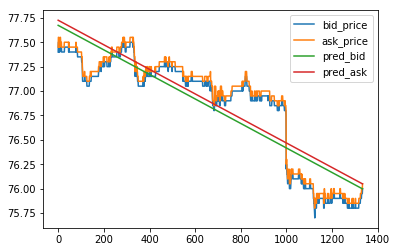

[ 7.74054475e+01 -5.37986102e-04]
[ 7.74574179e+01 -5.38119501e-04]


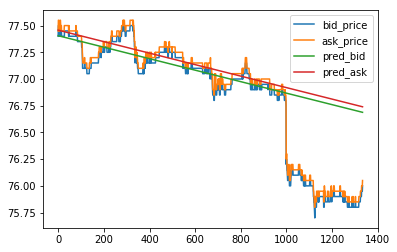

[ 7.70282333e+01 -9.37144900e-04]
[ 7.70833348e+01 -9.40624082e-04]


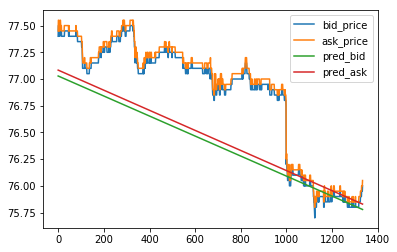

In [55]:
# Simple regression
Model.simple_reg_plot(0,Model.n)
Model.simple_reg_plot(1,big_drop)
Model.simple_reg_plot(big_drop,Model.n)

## Conclusion:
- From this plot, we could tell that the overall trend of the stock's price is decreasing. So $\color{red}{short\ selling}$ strategy should be $\color{red}{prefered}$, since we suppose there will be a decrease in the stock's price, we could buy in the stock at a lower price at the end of the day.
---

# Part V: Profiting Strategy Analysis
## Profit condition:


- ## Strategy i: Hold the Stock:
 - $Bid_{j}\ge Ask_{i}$,   $for\ j\ge i$ $~$e.g. $Bid_{i+window} - Ask_{i}\ge 0$


- ## Strategy ii: Short Selling: 
 - $Ask_{j}\le Bid_{i}$,   $for\ j\ge i$ $~$e.g. $Ask_{i+window} - Bid_{i}\le 0$



# Part VI: Automatic hyperparameter search: optimized window size

## the mechanism of Automatic window size search: 

- $\color{red}{Intuition:}$ This window means how long we look into the future once we buy one share of the stock. e.g. if the window size is 100 means, after we buy a stock or sell a short selling at time 0, we expect profit to be return at time 99.  


- $\color{red}{Algorithm:}$ simulate the deals on the fixed window size and observe the profit times&earning of 2 trategies. instead of modeling on the whole data, I trained the optimized hyperparameter on the two seperate data, called data1 and data2, divided by the big drop. In order to avoid the influence of the big drop.


- $\color{red}{Robustness:}$ I choose the profit times as my criteria rather than total profit value, because the profit times is more robust. Thus, suitable for the prediction.


- $\color{red}{Figure:}$ the use of the window, you can image that I move the rectangular of window from the left to the right on the time axis. We buy in stock or sell the short selling of share of the money we split over the lenght(size) of the rectangular at the time slot i once the time slot i enter the rectangular, and exercise the share once time slot leave the rectangular.

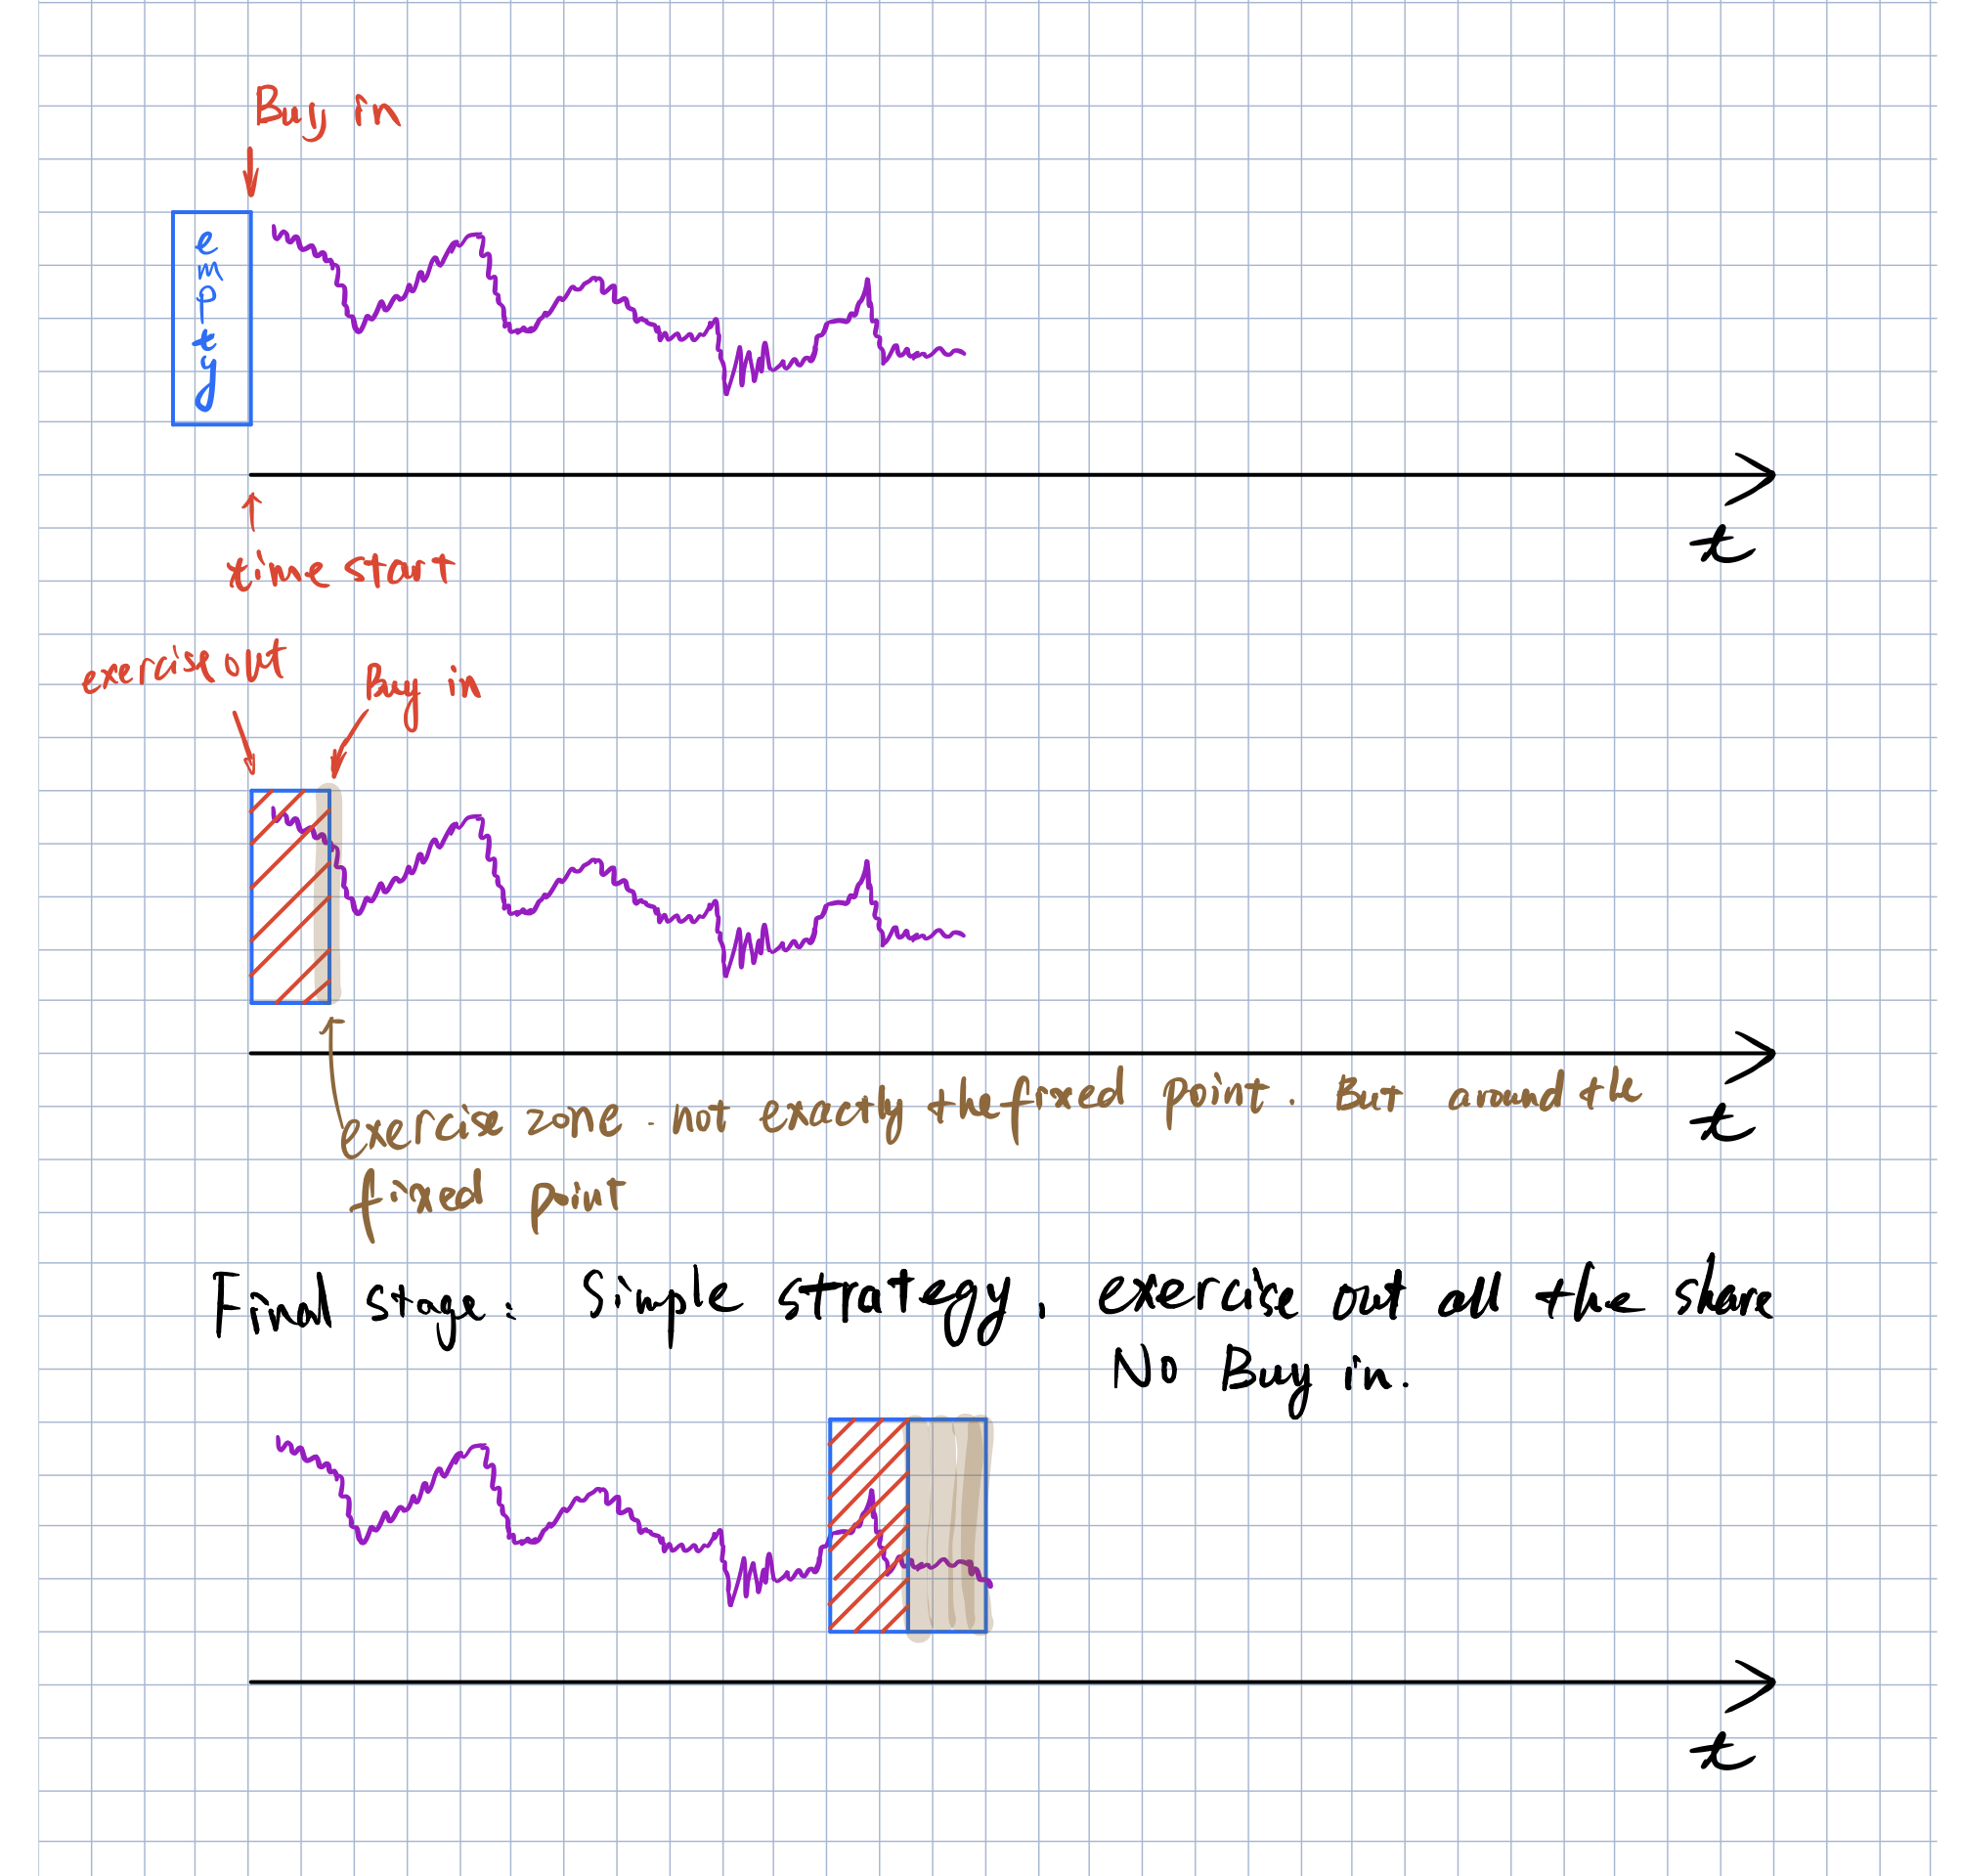

Plot the win, win-lose curve on the First data set
the optimized window size is: 77 with win times: 867


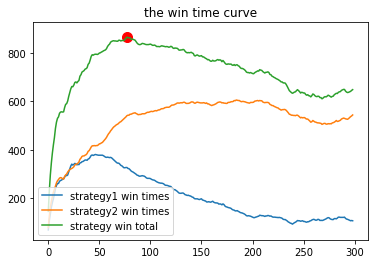

the optimized window size is: 207 with win times: 417


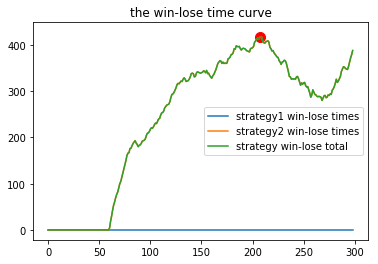

Plot the win, win-lose curve on the Second data set
the optimized window size is: 53 with win times: 243


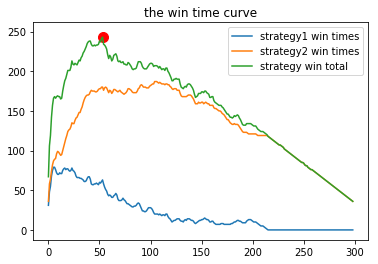

the optimized window size is: 116 with win times: 150


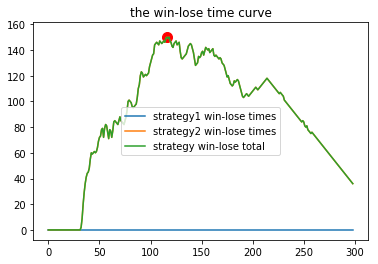

In [56]:
# hyperparameter  search

def plot_hyperparameter_search(search_range,Model,start,end):
    stategy1_wining_list = list()
    stategy2_wining_list = list()
    stategy1_total_list = list()
    stategy2_total_list = list()
    stategy_win_total = list()
    stategy_total = list()
    for i,val in enumerate(search_range):
        win1,win2,total1,total2 = np.maximum(0,Model.window_size_search(start,end,val))
#         print(win1,win2)
        stategy1_wining_list.append(win1)
        stategy2_wining_list.append(win2)
        stategy1_total_list.append(total1)
        stategy2_total_list.append(total2)
        stategy_win_total.append(win1+win2)
        stategy_total.append(total1+total2)
    plt.plot(stategy1_wining_list,label = 'strategy1 win times')
    plt.plot(stategy2_wining_list,label = 'strategy2 win times')
#     plt.plot(stategy1_total_list,label = 'strategy1 win-lose times')
#     plt.plot(stategy2_total_list,label = 'strategy2 win-lose times')
    plt.plot(stategy_win_total,label = 'strategy win total')
#     plt.plot(stategy_total,label = 'strategy win-lose total')
    plt.legend()

    max_index_win = stategy_win_total.index(max(stategy_win_total))
    max_val_win = max(stategy_win_total)
    s1_share_win = stategy1_wining_list[max_index_win]/max_val_win
    s2_share_win = stategy2_wining_list[max_index_win]/max_val_win
    plt.scatter(max_index_win,max_val_win,c = "r",s = 100)
    print('the optimized window size is:', max_index_win,'with win times:',max_val_win)
    plt.title("the win time curve")
    plt.show()
    
    
    plt.plot(stategy1_total_list,label = 'strategy1 win-lose times')
    plt.plot(stategy2_total_list,label = 'strategy2 win-lose times')
    plt.plot(stategy_total,label = 'strategy win-lose total')
    plt.legend()
    
    max_index_winlose = stategy_total.index(max(stategy_total))
    max_val_winlose = max(stategy_total)
    s1_share_winlose = stategy1_total_list[max_index_winlose]/max_val_winlose
    s2_share_winlose = stategy2_total_list[max_index_winlose]/max_val_winlose
    plt.scatter(max_index_winlose,max_val_winlose,c = "r",s = 100)
    print('the optimized window size is:', max_index_winlose,'with win times:',max_val_winlose)
    plt.title("the win-lose time curve")
    plt.show()
    
    return max_index_win,max_val_win,s1_share_win,s2_share_win
print("Plot the win, win-lose curve on the First data set")
search_range1 = np.arange(1,300)
max_index_1,max_val1,s1_share1,s2_share1 = plot_hyperparameter_search(search_range1,Model,0,big_drop)
print("Plot the win, win-lose curve on the Second data set")
search_range2 = np.arange(1,300)
max_index_2,max_val2,s1_share2,s2_share2 = plot_hyperparameter_search(search_range2,Model,big_drop,Model.n)


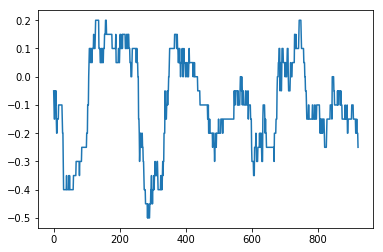

there is  271 times we can earn money, if we trade 77 time interval


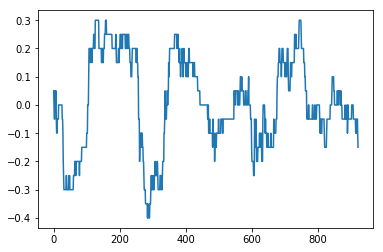

there is  420 times we can earn money, if we trade 77 time interval


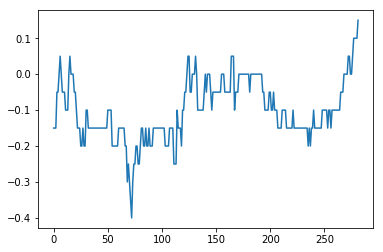

there is  16 times we can earn money, if we trade 53 time interval


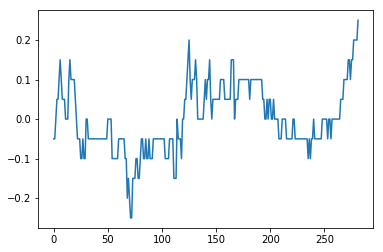

there is  127 times we can earn money, if we trade 53 time interval


In [57]:
# the detail of the trading
def trading_detail(time_interval,start,end):
    index_now = np.arange(start+time_interval,end)
    index_pre = (index_now-time_interval)
    # print(index_now)
    # print(index_pre)
    # the earning case for the first strategy
    diff = Model.bid_price[index_now] - Model.ask_price[index_pre]
    plt.plot(diff)
    plt.show()
    stategy1_earning_time = sum(diff>0)
    stategy1_earning = sum(diff[np.where(diff>0)])
    print("there is ",stategy1_earning_time,"times we can earn money, if we trade",time_interval,'time interval')
    # the earning case for the second strategy
    diff = Model.ask_price[index_now] - Model.bid_price[index_pre]
    plt.plot(diff)
    plt.show()
    stategy2_earning_time = sum(diff<0)
    stategy2_earning = -sum(diff[np.where(diff<0)])
    print("there is ",stategy2_earning_time,"times we can earn money, if we trade",time_interval,'time interval')

trading_detail(max_index_1,0,big_drop)
trading_detail(max_index_2,big_drop,Model.n)


In [58]:
# the final optimized window size is the weighted optimized size on two cases
window_size = np.floor(((big_drop/Model.n) * max_index_1) + ((1-big_drop/Model.n) * max_index_2))
print('The final window size is:',window_size)
s1_share = (big_drop/Model.n)*s1_share1 + (1-big_drop/Model.n)*s1_share2
s2_share = 1-s1_share
print('the weight for the first strategy(hold the stock) is:',s1_share,
      '\nthe weight for the Second strategy(short selling) is:',s2_share)

The final window size is: 70.0
the weight for the first strategy(hold the stock) is: 0.346690457155121 
the weight for the Second strategy(short selling) is: 0.653309542844879


## Comment
- I here only consider the window size which maxium the winning time, because in the end, the window only provide the information of the length of the zone I want to exercise the portfolio, it is not a fixed exercise time. So I want just want to maximum the chance I can make the profit in this window. Those not making the profit means I can exercise the portfolio in another time maybe around the window time.


- the final result is: window size = 70; money goes to first stategy: 34.67%; money goes to second stategy: 65.33%. Which is consistent with our previously analysis.

# Part VII: Machine Learning in the window zone

## The mechanism of Window Process Machine (I make up the name here😉):
- $\color{brown}{"Buff\ Zone\ and\ Prediction\ Zone"}$: Set a $\color{brown}{buff\ zone}$ for the exercise, means not exactly exercise at window time but around window time. In the picture is the $\color{brown}{"Prediction\ Zone"}$, suppose the prediction zone = 20 here, window zone = 70.


- Set a $\color{red}{"Exercise\ Region"}$ for the point to enter the status of "wait for exercise".


- all the state in the $\color{red}{"Exercise\ Region"}$ share the same $\color{brown}{"Prediction\ Zone"}$.


- to ease the computational complexity, I only do regression once for all state in $\color{red}{"Exercise\ Region"}$ and update the regression every time slot, In the First picture, from the $T_{P_0}$ to $T_{50}$ That is to say, if the current time is $T = i$, the training data is from $T_{i-90}$ to $T_i$ the pred_zone is $T_{i}$ to $T_{i+40}$


- the state $P_i$ have to leave the $\color{red}{"Exercise\ Region"}$ before time $T_{P_i+90}$.  e.g. $P_0$ has to leave at $T_{50}$.


- the leave criteria is: 
 - for stock $i$: $~~$   Ask_price($T_{current}$) $\geq$ max(Pred_Ask_price(pred_zone for state $P_i$))  Or $T_{current}\geq T_{P_i}+window_{size}+buff$ 
 - for short selling $i$: $~~$   Bid_price($T_{current}$) $\leq$ min(Pred_Bid_price(pred_zone for state $P_i$)) Or $T_{current}\geq T_{P_i}+window_{size}+buff$


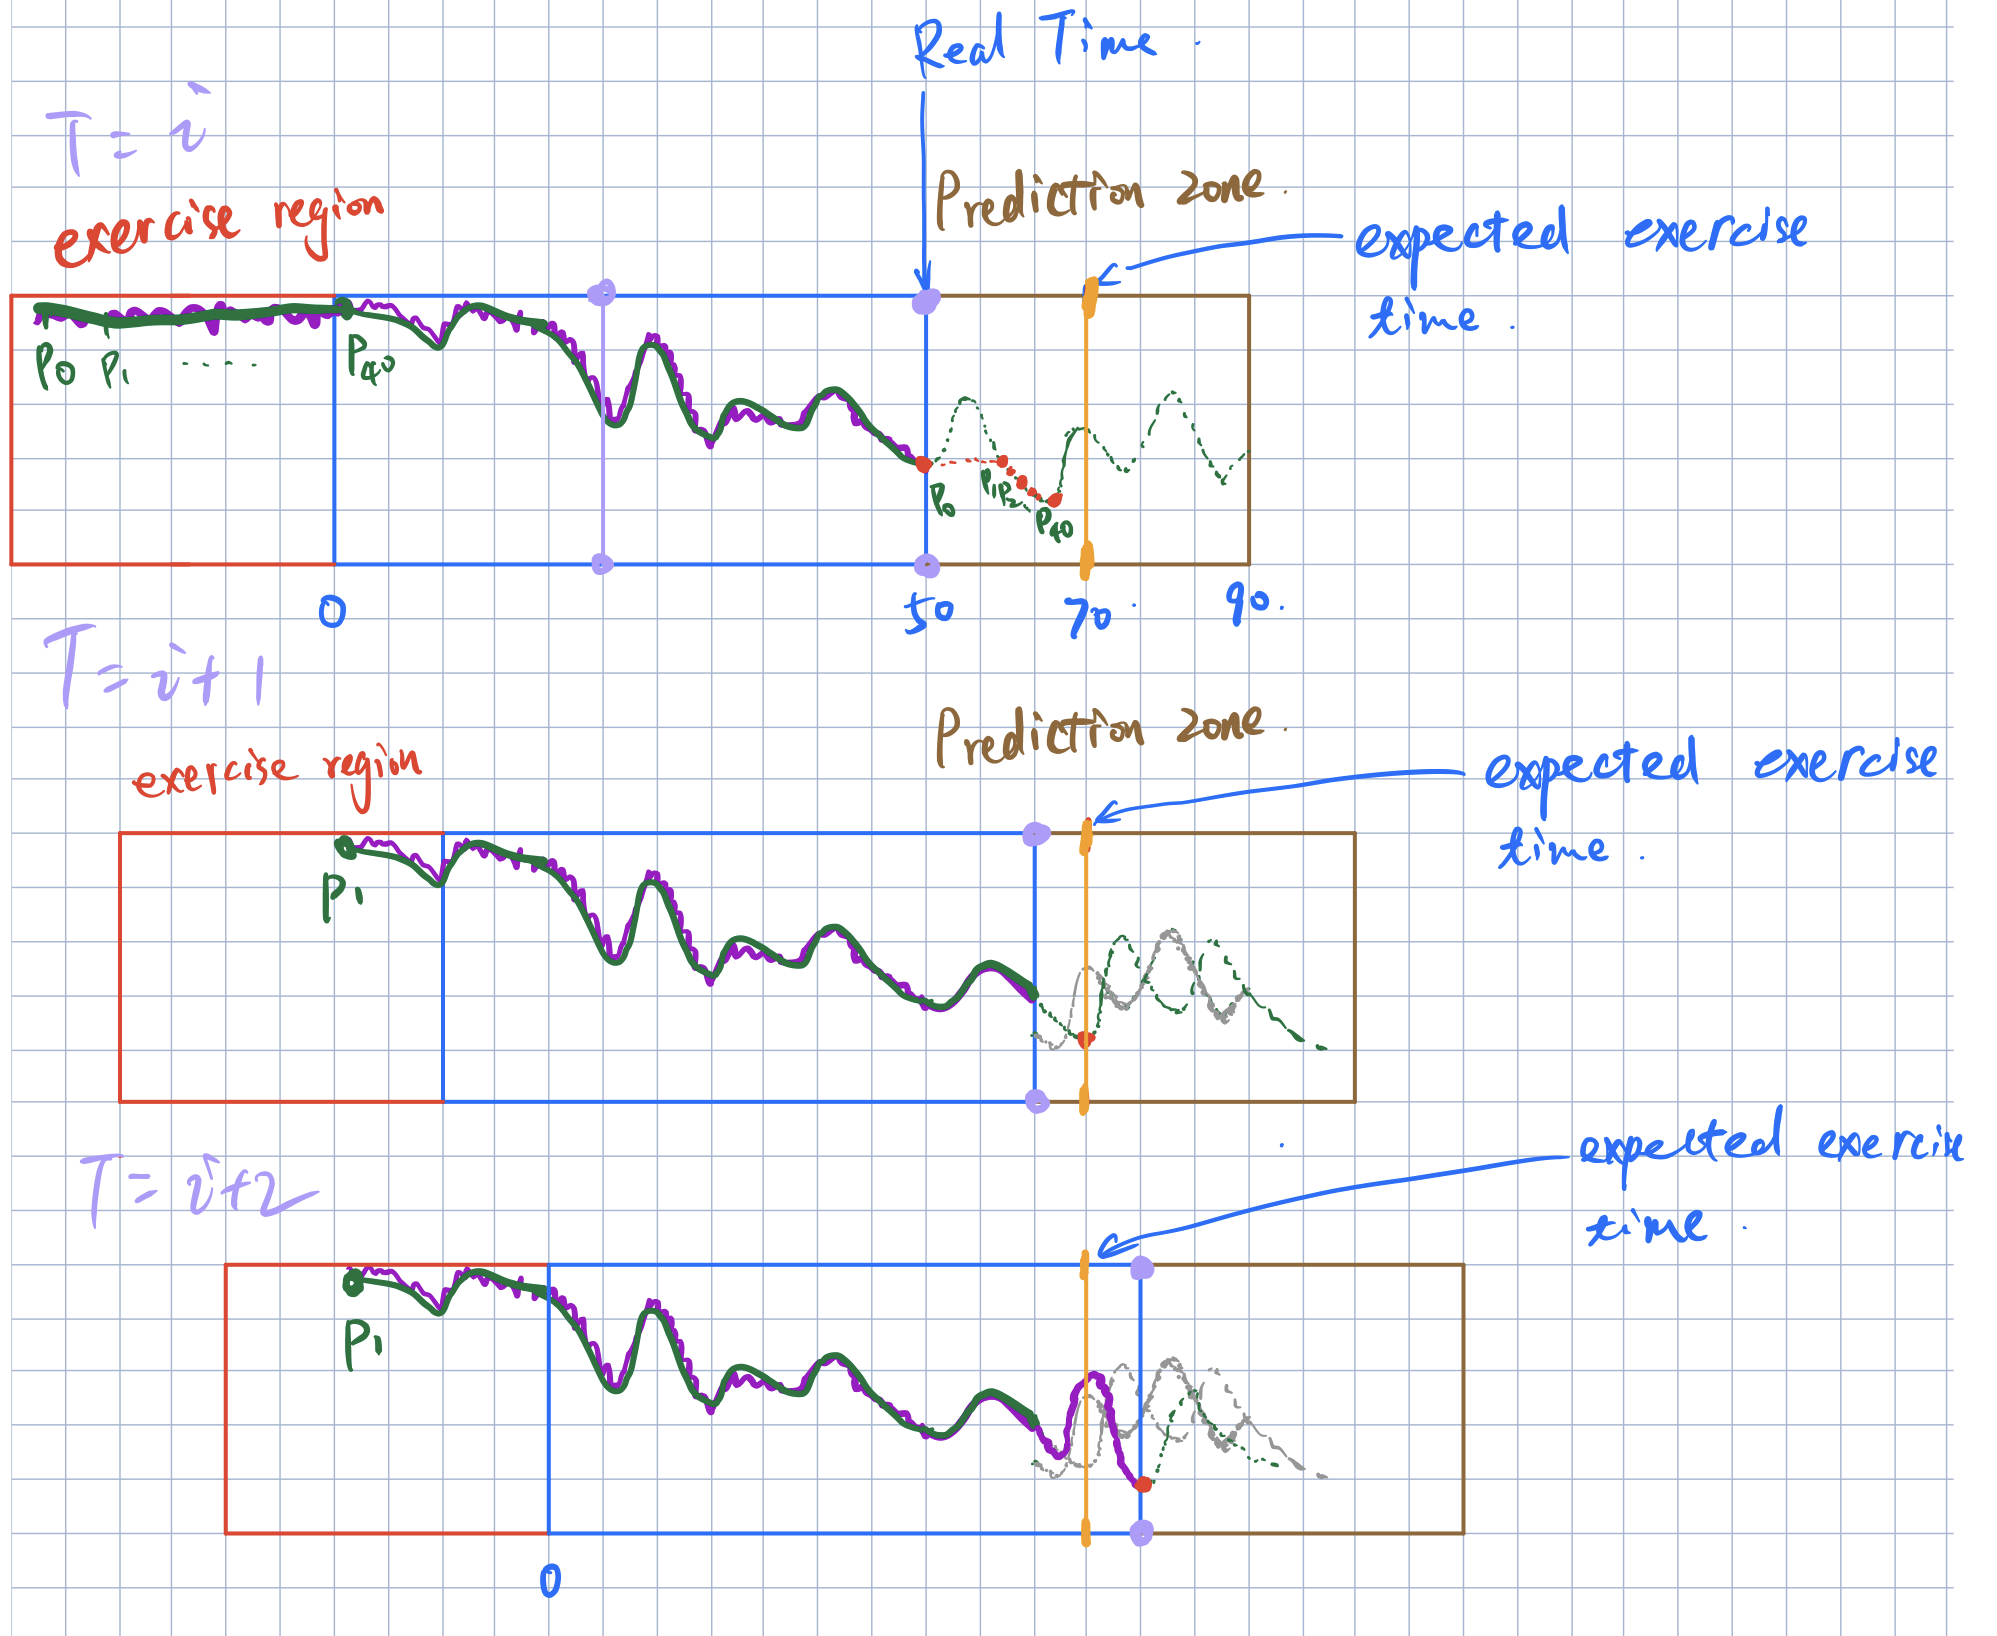

## comment
Now, Every setting is clear here, we can introduce the regression into the Game(the real player). Finally.

# Part VIII: Real Time Regression